# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# 2. Read the dataset

In [2]:
df = pd.read_csv('tweets.csv')
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


# 3. Split the dataset into X and y

In [3]:
X = df['status']
y = df['author']

# 4. Split the dataset into training set and testing set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(f'Train size: {X_train.shape}\t{X_train.shape[0] / df.shape[0]}% \n\
Test size: {y_test.shape} \t{X_test.shape[0] / df.shape[0]}%')

Train size: (300,)	0.75% 
Test size: (100,) 	0.25%


# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [5]:
#tfidf and countvectorizer imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
IDF = TfidfVectorizer()
CV = CountVectorizer()
X_train_idf = IDF.fit_transform(X_train)
X_test_idf = IDF.transform(X_test)
X_train_cv = CV.fit_transform(X_train)
X_test_cv = CV.transform(X_test)

In [6]:
X_train_idf.shape

(300, 2125)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [7]:
# Note: I will be using the same variables to save memory,
# so, I will overwrite the variables each time.
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train_idf, y_train)

LogisticRegression(random_state=42)

In [8]:
y_pred = LR.predict(X_test_idf)

In [9]:
cm_LR_idf = confusion_matrix(y_pred, y_test)

print(cm_LR_idf)    
print(classification_report(y_pred, y_test))    

[[49  8]
 [ 3 40]]
                 precision    recall  f1-score   support

Donald J. Trump       0.94      0.86      0.90        57
 Justin Trudeau       0.83      0.93      0.88        43

       accuracy                           0.89       100
      macro avg       0.89      0.89      0.89       100
   weighted avg       0.90      0.89      0.89       100



In [10]:
LR.fit(X_train_cv, y_train)

y_pred = LR.predict(X_test_cv)

cm_LR_CV = confusion_matrix(y_pred, y_test)

print(cm_LR_CV)
print(classification_report(y_pred, y_test))

[[49  7]
 [ 3 41]]
                 precision    recall  f1-score   support

Donald J. Trump       0.94      0.88      0.91        56
 Justin Trudeau       0.85      0.93      0.89        44

       accuracy                           0.90       100
      macro avg       0.90      0.90      0.90       100
   weighted avg       0.90      0.90      0.90       100



The model got slightly better results with count vectorizer than tfidf.

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [11]:
svm = SVC(random_state=42, kernel='poly')

In [12]:
y_pred = svm.fit(X_train_idf,y_train).predict(X_test_idf)

cm_SVC_idf = confusion_matrix(y_pred, y_test)

print(cm_SVC_idf)
print(classification_report(y_pred, y_test))

[[47  5]
 [ 5 43]]
                 precision    recall  f1-score   support

Donald J. Trump       0.90      0.90      0.90        52
 Justin Trudeau       0.90      0.90      0.90        48

       accuracy                           0.90       100
      macro avg       0.90      0.90      0.90       100
   weighted avg       0.90      0.90      0.90       100



In [13]:
y_pred = svm.fit(X_train_cv,y_train).predict(X_test_cv)

cm_SVC_CV = confusion_matrix(y_pred, y_test)

print(cm_SVC_CV)
print(classification_report(y_pred, y_test))

[[36  3]
 [16 45]]
                 precision    recall  f1-score   support

Donald J. Trump       0.69      0.92      0.79        39
 Justin Trudeau       0.94      0.74      0.83        61

       accuracy                           0.81       100
      macro avg       0.81      0.83      0.81       100
   weighted avg       0.84      0.81      0.81       100



# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [14]:
print('Confusion matrix for SVC \n',cm_SVC_idf)
print('Confusion matrix for LR \n',cm_LR_CV)

Confusion matrix for SVC 
 [[47  5]
 [ 5 43]]
Confusion matrix for LR 
 [[49  7]
 [ 3 41]]


# 9. Plot a confusion matrix for both Logistic Regression and SVM

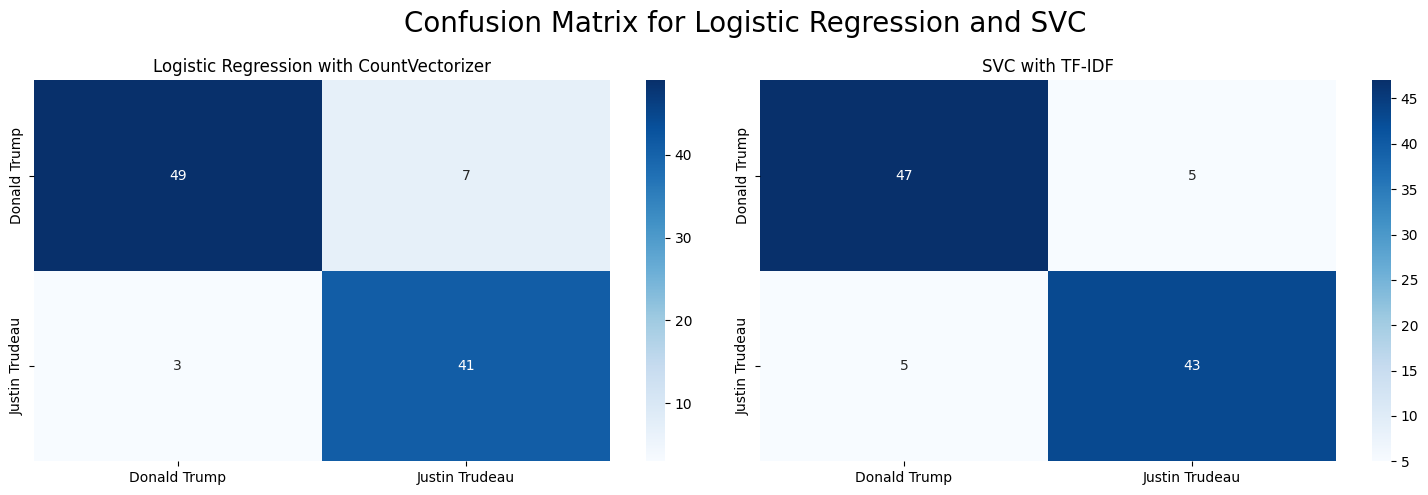

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.suptitle('Confusion Matrix for Logistic Regression and SVC', fontsize=20)

plt.subplot(1,2,1)
sns.heatmap(cm_LR_CV, annot=True, cmap='Blues')
plt.title('Logistic Regression with CountVectorizer')
plt.xticks([0.5,1.5], ['Donald Trump', 'Justin Trudeau'])
plt.yticks([0.5,1.5], ['Donald Trump', 'Justin Trudeau'])

plt.subplot(1,2,2)
sns.heatmap(cm_SVC_idf, annot=True, cmap='Blues')
plt.title('SVC with TF-IDF')
plt.xticks([0.5,1.5], ['Donald Trump', 'Justin Trudeau'])
plt.yticks([0.5,1.5], ['Donald Trump', 'Justin Trudeau'])

plt.tight_layout()
plt.show()